[[15]
 [18]
 [19]
 [20]
 [21]
 [22]
 [26]
 [27]
 [28]
 [29]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [15]
 [16]
 [17]
 [18]
 [19]
 [22]
 [23]
 [24]
 [25]
 [26]
 [29]
 [30]
 [ 1]
 [ 2]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [13]
 [14]
 [15]
 [16]
 [17]
 [20]
 [21]
 [22]
 [23]
 [24]
 [27]
 [28]
 [29]
 [30]
 [31]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [10]
 [11]
 [12]
 [13]
 [14]
 [17]
 [18]
 [19]
 [20]
 [21]
 [24]
 [25]
 [26]
 [27]
 [28]
 [31]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 8]
 [ 9]
 [10]
 [11]
 [14]
 [15]
 [16]
 [17]
 [18]
 [21]
 [22]
 [23]
 [24]
 [25]
 [28]
 [29]
 [30]
 [ 1]
 [ 2]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [12]
 [13]
 [14]
 [15]
 [16]
 [19]
 [20]
 [21]
 [22]
 [23]
 [26]
 [27]
 [28]
 [29]
 [30]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [16]
 [17]
 [18]
 [19]
 [20]
 [23]
 [24]
 [25]
 [27]
 [30]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [14]
 [15]
 [16]
 [17]
 [18]
 [21]
 [22]
 [23]
 [24]
 [28]
 [29]
 [30]
 [31]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [11]
 [12

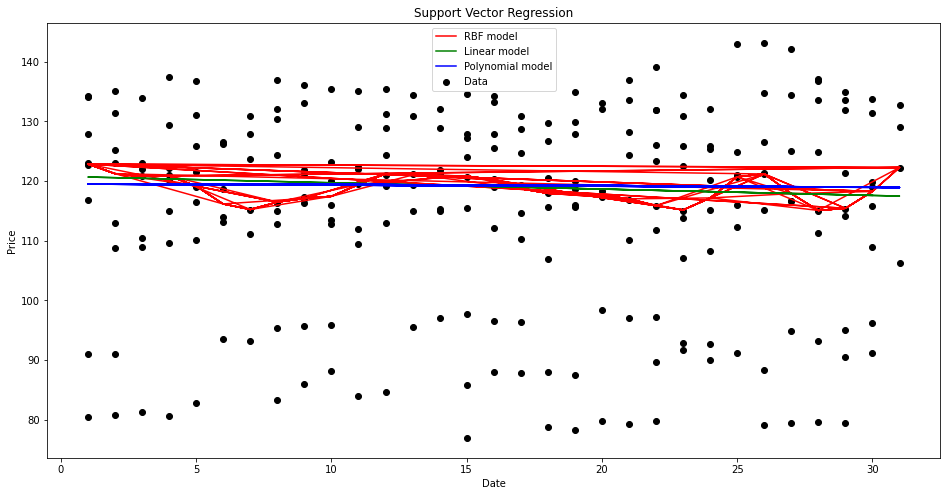

ValueError: Expected 2D array, got scalar array instead:
array=31.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [106]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


#plt.switch_backend('newbackend')  



dates = []
prices = []

def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)	# skipping column names
        for row in csvFileReader:
            dates.append(int(row[0].split('/')[0]))
            #print(int(row[0].split('/')[0]))
            prices.append(float(row[4]))
    return

def predict_price(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1
    print(dates)
    svr_lin = SVR(kernel= 'linear', C= 1e3)
    svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2)
    svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) # defining the support vector regression models
    svr_rbf.fit(dates, prices) # fitting the data points in the models
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    
    plt.figure(figsize=(16,8))
    plt.scatter(dates, prices, color= 'black', label= 'Data') # plotting the initial datapoints 
    plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
    plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model') # plotting the line made by linear kernel
    plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model') # plotting the line made by polynomial kernel
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

get_data('AAPLshort.csv') # calling get_data method by passing the csv file to it
#print "Dates- ", dates
#print "Prices- ", prices
# prices = np.asarray(prices)
# dates = np.asarray(dates)
# prices.reshape(-1, 1)
# dates.reshape(-1,1)
# prices = np.reshape(prices, (int(len(prices)/2),2), order='C')
predicted_price = predict_price(dates, prices, 31)  
print(predicted_price)

In [86]:
dates.shape

(242,)

In [82]:
prices = np.asarray(prices)

In [83]:
prices.reshape(-1, 1)
prices.shape

(242,)